# Assessment-3

### By Deepu John(20BDS0373)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df1 = pd.read_csv("books.csv")
df2 = pd.read_csv("book_tags.csv")
df3 = pd.read_csv("ratings.csv")

In [25]:
df1.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0


In [26]:
df2.head(3)

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182


In [27]:
df3.head(3)

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4


#### 1. How many books do not have an original title [books.csv]?

In [28]:
print(f"{df1['original_title'].isna().sum()} books do not have an original title")

36 books do not have an original title


#### 2. How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [29]:
df1_cleaned = df1.dropna(subset = "original_title")
df2_cleaned = df2[df2['goodreads_book_id'].isin(df1['book_id'])] 
df3_cleaned = df3[df3['book_id'].isin(df1['book_id'])]
print(f"{df1['original_title'].nunique()} unique books are present in the dataset")

#df1_cleaned has records with non-null value for original_title
#df2_cleaned has book-ids where the corresponding original_title is not null, retained
#df3_cleaned has book-ids where the corresponding original_title is not null, retained

363 unique books are present in the dataset


#### 3.How many unique users are present in the dataset [ratings.csv] ?

In [30]:
print(f"{df3['user_id'].nunique()} unique users are present in the dataset")

40836 unique users are present in the dataset


#### 4.How many unique tags are there in the dataset [book_tags.csv] ?

In [31]:
print(f"{df2['tag_id'].nunique()} unique tags are present in the dataset")

3651 unique tags are present in the dataset


#### 5.Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ?  

In [32]:
print(f"Tag id: {df2['tag_id'].value_counts().idxmax()} is mapped with the highest number of books")

Tag id: 4600 is mapped with the highest number of books


#### 6. Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] 

In [33]:
df1_df2_merged = pd.merge(df1, df2, on = "goodreads_book_id", how = "inner")
print(f"The book '{df1_df2_merged.groupby('title')['count'].sum().idxmax()}' has the most number of tags given by the user")

The book 'Bossypants' has the most number of tags given by the user


#### 7. Plot a bar chart with top 20 unique tags in descending order of ‘user records’

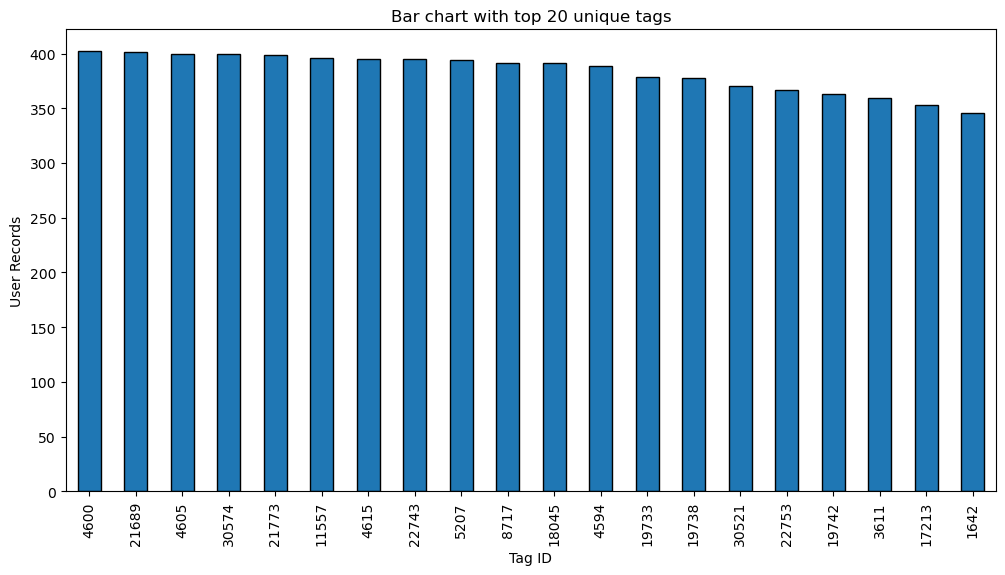

In [34]:
top20 = df2.groupby('tag_id')['goodreads_book_id'].count().nlargest(20)
top20.plot(kind='bar', figsize=(12, 6), title='Bar chart with top 20 unique tags', edgecolor = 'black')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()